# Setup



In [1]:
using Plots

# Functions



In [2]:
"""
    RK4(f, tpoints, r)

Solve a system of two first-order ODEs using the fourth-order Runge-Kutta method.

"""
function RK4(f, tpoints, r)
    h = tpoints[2] - tpoints[1]
    Npoints = length(tpoints)
    xpoints = zeros(Npoints)
    ypoints = zeros(Npoints)
    for (i, t) in enumerate(tpoints)
        xpoints[i] = r[1]
        ypoints[i] = r[2]
        k1 = h*f(r, t)
        k2 = h*f(r .+ 0.5*k1, t + 0.5*h)
        k3 = h*f(r .+ 0.5*k2, t + 0.5*h)
        k4 = h*f(r .+ k3, t + h)
        r = r .+ (k1 + 2*k2 + 2*k3 + k4) / 6
    end
    return xpoints, ypoints
end

RK4

# Compass in a magnetic field



In [3]:
"""
    EOM_compass(r, t, B, ω)

Equations of motion for a spinning compass in a periodically changing magnetic field

"""
function EOM_compass(r, t, B, ω)
    (x, v) = r
    dxdt = v
    dvdt = -B*cos(ω*t)*sin(x)
    return [dxdt, dvdt]
end    

EOM_compass

In [15]:
# Simulation parameters
a, b = 0.0, 50.0
Nsteps = 2000
tpoints = range(a, b, Nsteps+1)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
B = 0.3
ω = 1.0
f(r, t) = EOM_compass(r, t, B, ω)

(xpoints, vpoints) = RK4(f, tpoints, r);


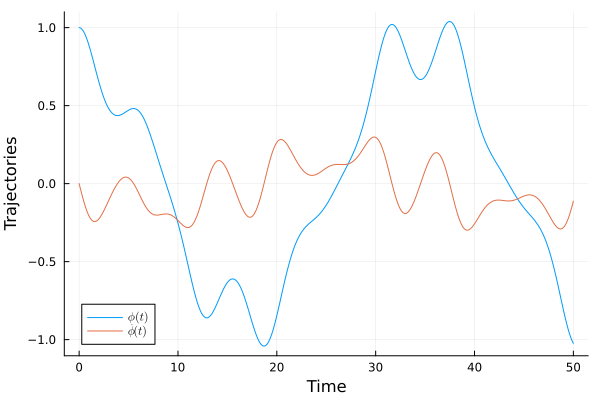

In [6]:
plot(tpoints, xpoints, label=raw"$\phi(t)$")
plot!(tpoints, vpoints, label=raw"$\dot\phi(t)$")

xlabel!("Time")
ylabel!("Trajectories")

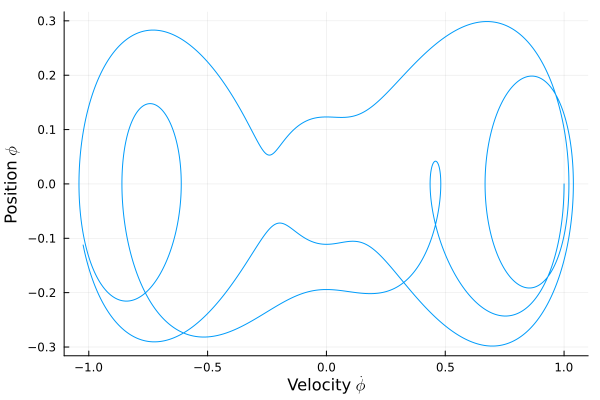

In [7]:
plot(xpoints, vpoints, label="")

xlabel!(raw"Velocity $\dot\phi$")
ylabel!(raw"Position $\phi$")

# Harmonic oscillator

- Intended for testing the RK4 code  



In [8]:
function hooke(r, t, k)
    (x, v) = r
    dxdt = v
    dvdt = -k*x
    return [dxdt, dvdt]
end

hooke (generic function with 1 method)

In [10]:
# Simulation parameters
a, b = 0.0, 10.0
Nsteps = 1000
tpoints = range(a, b, Nsteps+1)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)

(xpoints, vpoints) = RK4(f, tpoints, r);

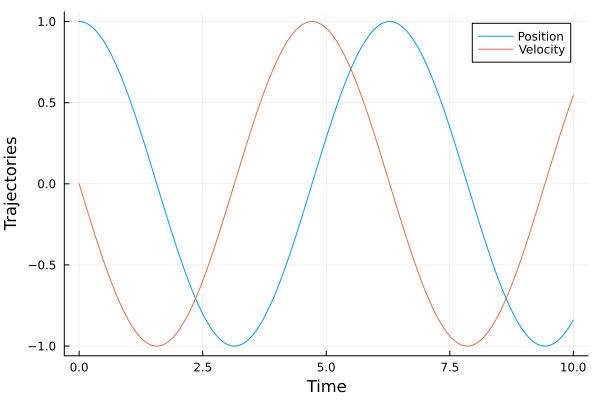

In [11]:
plot(tpoints, xpoints, label="Position")
plot!(tpoints, vpoints, label="Velocity")

xlabel!("Time")
ylabel!("Trajectories")